In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import xarray as xr
import model_eval

In [ ]:
def plot_domain(model, x_range=None, y_range=None):

    map_projection = model_eval.get_projection(model)

    fig, ax = plt.subplots(
        1,
        subplot_kw={
            "projection": map_projection 
        },
    )

    x = model.x.values
    y = model.y.values

    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(
        cfeature.LAKES, zorder=-10, edgecolor="none", facecolor=[0.0, 0.0, 0.8, 0.2]
    )
    ax.add_feature(
        cfeature.LAKES, zorder=2, edgecolor="k", linewidth=0.5, facecolor="none"
    )
    ax.add_feature(cfeature.RIVERS, edgecolor=[0, 0, 0.8, 0.2])
    ax.add_feature(
        cfeature.NaturalEarthFeature(
            category="cultural",
            name="admin_0_countries_deu",
            scale="10m",
            facecolor="none",
        ),
        edgecolor="black",
        zorder=14,
    )
    ax.gridlines(draw_labels=["left", "bottom"], x_inline=False, y_inline=False)
    
    # Set extent based on projected coordinates (x, y)
    ax.set_extent([x.min(), x.max(), y.min(), y.max()], crs=map_projection)

    # Add red rectangle if indices are provided
    if x_range is not None and y_range is not None:
        # Get the actual coordinates from the indices
        x_min, x_max = x[x_range[0]], x[x_range[1]]
        y_min, y_max = y[y_range[0]], y[y_range[1]]
        
        # Create rectangle vertices
        rect = plt.Rectangle(
            (x_min, y_min), 
            x_max - x_min, 
            y_max - y_min,
            linewidth=2, 
            edgecolor='red', 
            facecolor='none',
            zorder=20  # Make sure it's on top
        )
        ax.add_patch(rect)

    plt.title('AROME-MetCoOp Model Domain')
    plt.savefig('figures/model_domain_fig.png')

    plt.show()

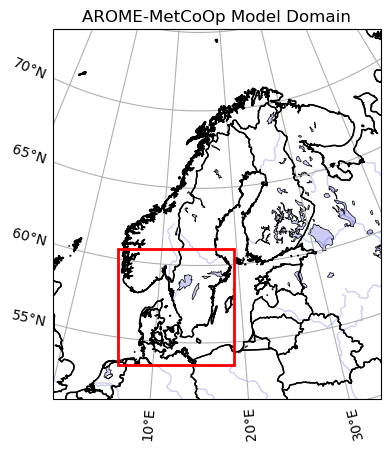

In [ ]:
ds = xr.open_dataset('data/ringhals_20230101_00Z.nc', engine="netcdf4")
plot_domain(ds, x_range=(188, 524), y_range=(97, 433))